## An addition on /Pytorch_Classification.ipynb.

Notes:
* Binary classification = one thing or another (cat vs dog). Spam email vs not spam.
* Multi-class Classification = more than one thing or another (Dog Vs Cat Vs Pengiun)

When compared to binary classification I will be changing two things:
1. Using Softmax as our activation function instead of sigmoid.
2. Using Cross entroy for the loss function instead of binary crossentropy

_Multi Class Classification_
1. `torch.softmax()`
2. `torch.nn.CrossEntropyLoss()`

_Binary Class Classification_
1. `torch.sigmoid()`
2. `torch.nn.BCELoss()`


In [153]:
# Creating a toy multiclass dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from torch import nn
import numpy as np

In [154]:
# Setting hyperparameters for data
num_classes = 4
num_features = 2
random_seed = 42

# Creating multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = num_features,
                            centers=num_classes,
                            cluster_std=1.5,
                            random_state=random_seed)
X_blob[:10], y_blob[:10]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475],
        [-6.7941075 , -6.47722117],
        [ 5.21017561,  2.8890483 ],
        [-5.50513568, -6.36037688],
        [-6.54375599, -4.83389895],
        [ 6.44964229,  0.74776618]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [155]:
X_tensor = torch.from_numpy(X_blob).type(torch.float32)
y_tensor = torch.from_numpy(y_blob).type(torch.LongTensor)
X_tensor[:10], y_tensor[:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [156]:
X_tensor.dtype, y_tensor.dtype

(torch.float32, torch.int64)

In [157]:
# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size=0.2,
                                                    random_state=random_seed)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [158]:
X_blob

array([[-8.41339595,  6.93516545],
       [-5.76648413, -6.43117072],
       [-6.04213682, -6.76610151],
       ...,
       [ 3.2157805 ,  5.92174278],
       [-7.79389549, -7.16056655],
       [-9.6815798 ,  7.0096901 ]])

In [159]:
X_blob.shape

(1000, 2)

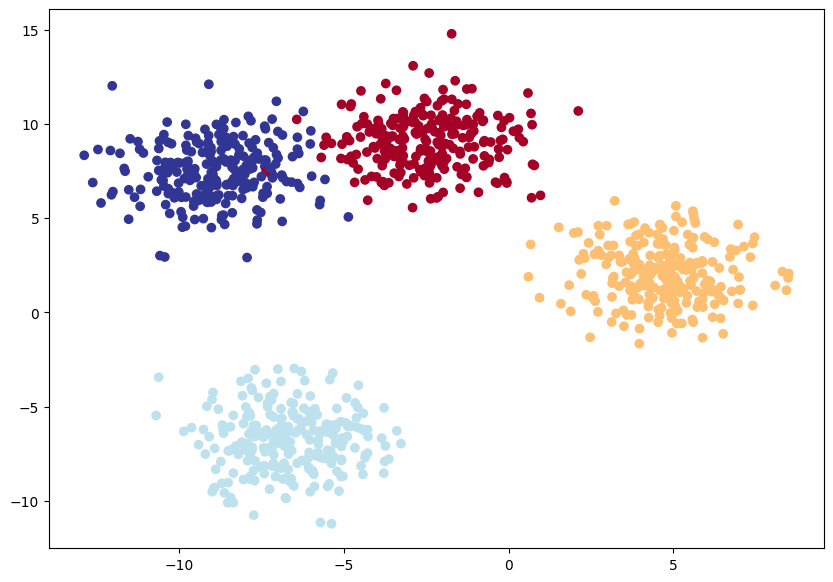

In [160]:
# Plotting the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [161]:
# Building multiclass classification
# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [162]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    """Initalize multiclass classification model

    Args:
      input_features (int) : Number of input features to the models
      output_features (int) : Number of output features (number of output classes)
      hidden_units (int) : Number of hidden units between layers, default we set to 8

      Returns:

      Eample:
      """
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instace of blob model and sent it to the target device

model = BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [163]:
X_tensor.shape, y_tensor[:5]

(torch.Size([1000, 2]), tensor([3, 2, 2, 1, 1]))

In [164]:
# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1) # lr is a hyperparamter you can change


# When you come back sunny try passing in the data. and create the class

In [165]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# In order to evaluate, test and train our model we need to convert our models outputs (logits) to prediciton probabilities and then to prediction labels

- Logits (raw outputs of the model) -> pred probs (use `torch.softmax`) -> pred labels (take the argmax of the prediction probabilities)

In [166]:
# Lets gets some get some raw outputs of our model (logits)
model.eval()
with torch.inference_mode():
  y_logits = model(X_test)
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [167]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [168]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [169]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [170]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [171]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [172]:
# Convert our models predictions probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [173]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

# Create training and testing loop for multiclass pytorch model


In [174]:
X_train

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        ...,
        [-1.7366,  9.7850],
        [-6.8139, -7.1006],
        [-9.0311,  4.5007]])

In [175]:
# Training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# loop through data
for epoch in range(epochs):
  model.train()

  y_logits = model(X_train)

  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    # Print epochs
    if epoch % 5 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test Loss: 1.0755, Test acc: 48.00%
Epoch: 5 | Loss: 0.8023, Acc: 91.12% | Test Loss: 0.8027, Test acc: 94.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test Loss: 0.6607, Test acc: 97.50%
Epoch: 15 | Loss: 0.5305, Acc: 98.38% | Test Loss: 0.5419, Test acc: 99.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test Loss: 0.4307, Test acc: 100.00%
Epoch: 25 | Loss: 0.3355, Acc: 99.12% | Test Loss: 0.3352, Test acc: 100.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test Loss: 0.2451, Test acc: 99.50%
Epoch: 35 | Loss: 0.1712, Acc: 99.25% | Test Loss: 0.1590, Test acc: 99.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test Loss: 0.1023, Test acc: 99.50%
Epoch: 45 | Loss: 0.0820, Acc: 99.25% | Test Loss: 0.0737, Test acc: 99.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test Loss: 0.0585, Test acc: 99.50%
Epoch: 55 | Loss: 0.0569, Acc: 99.25% | Test Loss: 0.0492, Test acc: 99.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test Loss: 0.0429, Test acc: 99.50%
Epoch: 65 | 

In [176]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


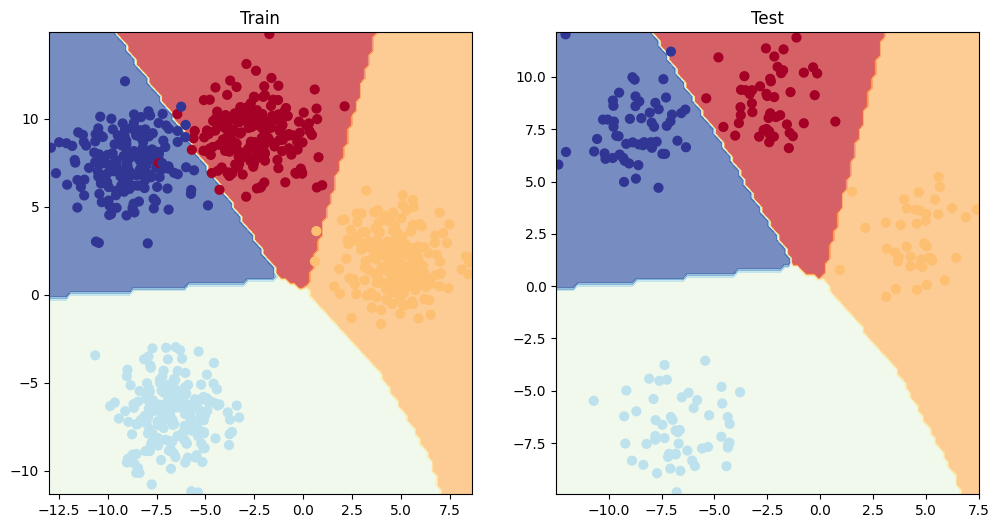

In [177]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)